# Assignment 3

## Objective of this assignment
The objective of this exercise is to become familiar with fitting decision trees and
making ROC curves in Python.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **(and nothing else)** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, Introduction to Data Mining, section 4.1-4.6, as well as the included article on ROC curves.


## 3.1 Decision trees

In this part of the exercise we will fit decision trees using the scikitlearn classifier
`sklearn.tree.DecisionTreeClassifier`. As a splitting criterion, the function uses
one of the following two impurity measures:

\begin{equation} \textrm{gdi}(t) = -\sum_{i=1}^C p(i|t)^2 \quad \text{       equivalent to Gini(t)} \end{equation}   

\begin{equation}
\textrm{deviance}(t) = -2\sum_{i=1}^C p(i|t) \log p(i|t) \quad \text{equivalent to Entropy(t)} 
\end{equation}

We will analyze the wine data we have used previously. The wine data set has the following attributes, all of which are continuous: 


| #             | Attribute     | Unit  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | g/dm$^3$ |
|2 | Volatile acidity (acetic) | g/dm$^3$ |
|3 | Citric acid | g/dm$^3$ |
|4 | Residual sugar | g/dm$^3$ |
|5 | Chlorides | g/dm$^3$ |
|6 | Free sulfur dioxide | mg/dm$^3$ |
|7 | Total sulfur dioxide | mg/dm$^3$ |
|8 | Density | g/cm$^3$ |
|9 | pH | pH |
|10 | Sulphates | g/dm$^3$ |
|11 | Alcohol | % vol. | 


#### 3.1.1
(0.5 pts) Load the wine data set `Data/wine.mat` using the `scipy.io` `loadmat` function. This contains the same data as used in the earlier assignment, but with outliers and the 12th attribute already removed. Create data matrix $X$, class vector $y$, and the lists $attributeNames$ and $classNames$ with the data provided in the `wine.mat` file. Print out the  $attributeNames$ and $classNames$ to make sure it's a list of strings.

   ** hints: **   
*The object in wine.mat is a dictionary. The attributes are stored in matrix $X$, the class in vector $y$. $y$ is shaped as an array containing single element arrays. To flatten $y$, you can use `y.ravel()`, which unravels matrices into a 1d array. Attribute names and class names are stored in the attributeNames and classNames objects, which contain arrays, of which the first element contains the names. To get the names from those arrays, you can use list comprehension or for-loops. For more on list comprehension, check https://www.digitalocean.com/community/tutorials/understanding-list-comprehensions-in-python-3. For example, if you have an larger array containing nested arrays of which you want the first element, you can try `new_array = [nested_array[0] for nested_array in larger_array]`.*



In [1]:
import scipy.io as sci
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


data = sci.loadmat('Data/wine.mat')
att = data['attributeNames']
cla = data['classNames']
X = data['X']
y = data['y']

#y.ravel()

att = [a[0] for a in att[0]]
cla = [a[0][0] for a in cla]
print(att)
print(cla)


['Fixed acidity', 'Volatile acidity', 'Citric acid', 'Residual sugar', 'Chlorides', 'Free sulfur dioxide', 'Total sulfur dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']
['Red', 'White']


#### 3.1.2
 (1.5 pts) Fit a decision tree to the wine data in order to estimate if the wine is red or white. Use the Gini (gdi) splitting criterion. Use `min_samples_split=100` for the stopping criterion. Explain what happens when you change the values of the parameter `min_samples_split`. After fitting the tree, visualize it with the tree_print function in `treeprint.py` in the Toolbox folder. 

** hints: **   
*The `treeprint.py` file contains some documentation on how to use it. Helpfull documentation for the DecisionTreeClassifier function can be found at * http://scikit-learn.org/stable/modules/tree.html#classification  



In [2]:
from sklearn import tree
import imp
toolbox=imp.load_source('t', 'Toolbox/treeprint.py')
clf = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=100)

c = clf.fit(X, y)
toolbox.tree_print(c, att, cla)

         |->3  White
         |
      |->2 then if Sulphates =< 0.56: go to 3, else go to 4
      |  |
      |  |->4  White
      |
   |->1 then if Chlorides =< 0.05: go to 2, else go to 5
   |  |
   |  |  |->6  White
   |  |  |
   |  |->5 else if Sulphates =< 0.37: go to 6, else go to 7
   |     |
   |     |  |->8  White
   |     |  |
   |     |->7 else if Density =< 0.99: go to 8, else go to 9
   |        |
   |        |     |->11  White
   |        |     |
   |        |  |->10 then if Residual sugar =< 1.10: go to 11, else go to 12
   |        |  |  |
   |        |  |  |  |->13  Red
   |        |  |  |  |
   |        |  |  |->12 else if Density =< 0.99: go to 13, else go to 14
   |        |  |     |
   |        |  |     |  |->15  Red
   |        |  |     |  |
   |        |  |     |->14 else if Chlorides =< 0.05: go to 15, else go to 16
   |        |  |        |
   |        |  |        |  |->17  Red
   |        |  |        |  |
   |        |  |        |->16 else if Sulphates =< 0.45:

----
min_samples_split = The minimum number of samples required to split an internal node. That means that the higher you make the value of the variable, the lower your tree depth will be. This is because stops when it needs more samples than available. If you put the value at 5000, the tree depth is 1. At 10 it's 21.

----

#### 3.1.3

(0.5 pts) Show that a wine with the following attribute values would be classified as white by the tree fitted in 3.1.2, by applying the `predict()` function from the DecisionTreeClassifier to this sample.  Have another look at the visualized tree. Which attributes are used to classify this wine? 

| #             | Attribute     | Value  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | 6.9 g/dm$^3$ |
|2 | Volatile acidity (acetic) | 1.09 g/dm$^3$ |
|3 | Citric acid | 0.06 g/dm$^3$ |
|4 | Residual sugar | 2.1 g/dm$^3$ |
|5 | Chlorides | 0.0061 g/dm$^3$ |
|6 | Free sulfur dioxide | 12 mg/dm$^3$ |
|7 | Total sulfur dioxide | 31 mg/dm$^3$ |
|8 | Density | 0.99 g/cm$^3$ |
|9 | pH | 3.5 |
|10 | Sulphates | 0.64 g/dm$^3$ |
|11 | Alcohol | 12 % vol. | 

** hints: **
*If you don't know how to classify input values with a tree, see the help documentation for the DecisionTreeClassifier function on how to predict the label for a sample. *

In [3]:
c.predict([[6.9,1.09,0.06,2.1,0.0061,12,31,0.99,3.5,0.64,12]])

array([1], dtype=uint8)

----
The attributes used to classify this wine are total sulfur dioxide and chlorides. It also checks on sulfates, but the value of that attribute doesn't actually matter. Because at that point in the tree it will come out as white wine, no matter what the threshold is.

----

#### 3.1.4
(1 pts) Classify all the wines in the wine data set. What percentage of the wine data is classified correctly by the tree?



In [4]:
from sklearn.metrics import accuracy_score

accuracy_score(y,c.predict(X))

0.9868337563451777

----
Approximately 98.68% of the wines are classified correctly by the tree.

----

## 3.2 Decision tree pruning using cross-validation

In this exercise we will use cross-validation to prune a decision tree. When applying cross-validation the observed data is split into training and test sets, i.e., `X_train`, `y_train` and `X_test` and `y_test`. We train the model on the training data and evaluate the performance of the trained model on the test data.

#### 3.2.1
(2 pts) We are again using the wine data set `Data/wine.mat`. Divide the data into a training and a test data set (see hints!). Fit a decision tree to the training data using the Gini (`gdi`) splitting criterion.

Now, we want to find an optimally pruned decision tree by *modifying its maximum depth*. For different values of the parameter `depth` (from 2 to 20), 
+ first fit the decision tree
+ then compute the classification error on the training and test set (this is called holdout cross-validation)

When you've done this for `depth` values 2,...,20, plot the training and test classification error as a function of the tree depth in the same figure. This will show us what the optimal pruning depth is for the training set, but also how well this generalizes to a test set. 


** hints: **  
*Take a look at the module `sklearn.model_selection` and see how it can be used to partition the data into a training and a test set (holdout validation, `train_test_split()` function). Note that the package also contains functions to partition data for K-fold cross-validation. Some of the functions can ensure that both training and test sets have roughly the same class proportions. The error is 1-accuracy. The easiest way to compute the accuracy is by using the sklearn metrics module: 
 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html *

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data?


[0.04737733 0.02432318 0.01670897 0.0143824  0.01353638 0.01353638
 0.01353638 0.01353638 0.01353638 0.01353638 0.01353638 0.01353638
 0.01353638 0.01353638 0.01353638 0.01353638 0.01353638 0.01353638
 0.01353638]
[0.0463198  0.02347716 0.01649746 0.01395939 0.01332487 0.01332487
 0.01332487 0.01332487 0.01332487 0.01332487 0.01332487 0.01332487
 0.01332487 0.01332487 0.01332487 0.01332487 0.01332487 0.01332487
 0.01332487]


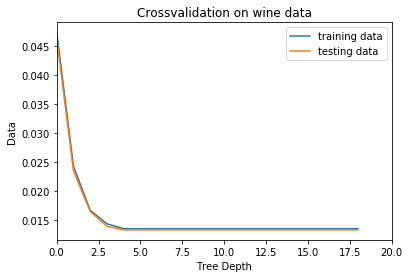

In [114]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y)

train = np.zeros(19)
test = np.zeros(19)

for idx, i in enumerate(range (2,21)):
    clft = tree.DecisionTreeClassifier(criterion='gini',max_depth=i,min_samples_split=100)
    ctrain = clft.fit(X_train, y_train)
    errorTrain=1-(accuracy_score(y_train,ctrain.predict(X_train)))
    errorTest = 1-(accuracy_score(y_test,ctrain.predict(X_test)))
    train[idx] = errorTrain
    test [idx] = errorTest
    
plt.plot(train, label=("training data"))
plt.plot(test, label=("testing data"))
plt.xlim(0, 20)
plt.title("Crossvalidation on wine data")
plt.xlabel("Tree Depth")
plt.ylabel("Data")
plt.legend()

print(train)
print(test)


----
In general, the error gets smaller when the tree-depth gets higher. The errors change a bit for every time you run it because the split is different. However, for every time it counts that after depth 4 or 5(ish) the errors stay the same as you go higher. Concluding from that, the ideal tree-depth already lies by 4.

----

#### 3.2.2
(1.5 pts) Repeat the exercise above, using 10-fold cross-validation. K-fold cross-validation works by splitting X into K partitions of equal length. Then in each fold, you choose K-1 partitions as the training set and the remaining partition as the test set. Every partition gets a turn being a test set. For a very nice simple explanation of how (and why) K-fold works, check out http://www.dummies.com/programming/big-data/data-science/resorting-cross-validation-machine-learning/


For each fold, fit a decision tree on the training set and evaluate its performance on the test set. Finally, compute the average classification errors on the test- and training sets across the 10 cross-validation folds and plot them as a function of the tree depth.

** hints: **
*This time the `KFold()` function from the module `sklearn.model_selection` can be used to partition the data into the 10 training and test partitions. Check out http://scikit-learn.org/stable/modules/cross_validation.html#k-fold for an example of how to acces the indices for the training set and the test set in each fold. Those indices can then be used to create the training and test set, e.g. `X_train = X[train_indices]`*

*If you are creating a for loop iterating over an object where you both need the index and the elements of the object, you can enumerate the object. For example:*

`
for index, (element) in enumerate(object):
    array[index] = operation(element)
`
 

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data? How about 100-fold cross-validation?


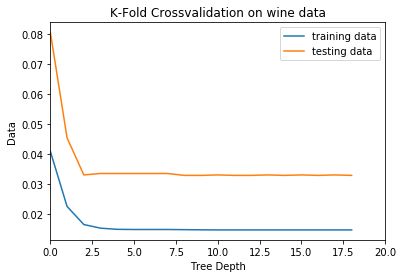

In [113]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
X_train = []
X_test = []
y_train = []
y_test = []
 
for train_index, test_index in kf.split(X):
    X_train.append(X[train_index])
    y_train.append(y[train_index])  
    X_test.append(X[test_index])
    y_test.append(y[test_index]) 

errorTrain = []
errorTest = []
trainSum = 0
testSum = 0

for i in range(2,21):
    for idx in range(0,10):
        clft = tree.DecisionTreeClassifier(criterion='gini',max_depth=i,min_samples_split=100)
        ctrain = clft.fit(X_train[idx], y_train[idx])
        errTr= 1-(accuracy_score(y_train[idx],ctrain.predict(X_train[idx])))
        errTe = 1-(accuracy_score(y_test[idx],ctrain.predict(X_test[idx])))
        trainSum = trainSum + errTr
        testSum = testSum + errTe   
    errorTrain.append(trainSum/10)
    errorTest.append(testSum/10)
    trainSum = 0
    testSum = 0
    

plt.plot(errorTrain, label=("training data"))
plt.plot(errorTest, label=("testing data"))
plt.xlim(0, 20)
plt.title("K-Fold Crossvalidation on wine data")
plt.xlabel("Tree Depth")
plt.ylabel("Data")
plt.legend()
    

---
Using K-Fold Crossvalidation with 10 splits it appears that the tree-depth of about 2.5, bit less for the testing data - bit more for the training data, is the optimal one. As already seen in the previous exercise, the plots change a little but the change is less visible.
Using 100 splits, the optimal tree-depth changes drastically. For the testing data it would be between 0-2 and for training data it would be about 4. Also the changes are so little, they don't seem to appear on the plot.

----

 ## 3.3 ROC curves, AUC scores, and the sign test

In this exercise we will use ROC curves and the sign test to compare classifiers. Study the lecture slides and the paper 'ROC Graphs: Notes and Practical Considerations for Researchers' by Tom Fawcett included with the homework assignment (ROC101.pdf). It describes all you need to know (and much, much more..) about ROC curves. The method explained for computing the area under the curve is unnecessarily complicated. A simpler formula is:
$$
    \mbox{AUC} = {1 \over m n} \sum_{i=1}^m \sum_{j=1}^n \mathbf{\large 1}_{p_i > p_j} \: .
   $$
Here $i$ runs over all $m$ data points with true label 1, and $j$ runs over all $n$ data points with true label $0$; $p_i$ and $p_j$ denote the probability score assigned by the classifier to data point $i$ and $j$, respectively. $\mathbf{\large 1}$ is the indicator function: it outputs $1$ if the condition (here $p_i > p_j$) is satisfied and $0$ otherwise. *Simply put: this formula computes how often the probability of a data point with true label 1 is higher than the probability of data points with true label 0. This is then divided by the total number of comparisons between probabilities.*
    

#### 3.3.1
(0.25 pts) To make sure you understand how ROC works, make an ROC curve and calculate the AUC (on paper) with the following data:

`
labels = [0,0,0,1,0,1,1,0,1,1]
classifier_probs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
`
    
What's the AUC you calculated? Do you think this classifier works well?


----
The AUC we calculated is 0.84. An excellent model has AUC near to 1.0, which means it has a good measure of separability. 0.84 comes quite close to that so we think the classifier works well.

----

#### 3.3.2
  Load the file `Data/classprobs.xls` using the Pandas `read_excel` function. Inspect the data and cast it to an array with the `.values` attribute. The first column gives the true class label (either 0 or 1). The second and third column give the probabilistic scores for two different classifiers. The higher this probability, the more certain the classifier is that the example belongs to class 1 (instead of class 0).


In [53]:
import pandas as pd

data = pd.read_excel('Data/classprobs.xls')
data = data.values
print(data)

[[0.       0.13591  0.099401]
 [0.       0.55549  0.65075 ]
 [0.       0.23876  0.50857 ]
 [0.       0.14542  0.23629 ]
 [1.       0.81876  0.48949 ]
 [0.       0.50594  0.038203]
 [1.       0.93954  0.23982 ]
 [1.       0.22339  0.62287 ]
 [0.       0.31219  0.57823 ]
 [0.       0.19486  0.61664 ]
 [1.       0.61471  0.5013  ]
 [1.       0.63854  0.75183 ]
 [0.       0.29924  0.33768 ]
 [0.       0.16546  0.44035 ]
 [1.       0.72124  0.44813 ]
 [0.       0.1088   0.37254 ]
 [1.       0.48676  0.25349 ]
 [1.       0.94156  0.64531 ]
 [0.       0.2968   0.53258 ]
 [0.       0.24267  0.26251 ]
 [0.       0.17043  0.44888 ]
 [0.       0.015464 0.5467  ]
 [1.       0.30852  0.32406 ]
 [0.       0.11212  0.28476 ]
 [0.       0.29639  0.41658 ]
 [1.       0.97275  0.79959 ]
 [1.       0.58501  0.30657 ]
 [0.       0.12244  0.43778 ]
 [1.       0.87557  0.75815 ]
 [1.       0.76142  0.32031 ]
 [0.       0.14132  0.22986 ]
 [1.       0.86004  0.35583 ]
 [0.       0.13915  0.39455 ]
 [0.      

#### 3.3.3
(1 pts) Calculate the ROC curves for both of the classifiers by calculating the FP and TP rates and plot them in the same plot. Make the plot yourself as opposed to using a library! Also plot a dashed line on the diagonal to represent random guessing in the same figure. Interpret the obtained results. Do both classifiers perform better than random guessing?

** hints: **  
*The function `sklearn.metrics.roc_curve` can be used for computing the FP and TP rates. You can then plot them using the `matplotlib.pyplot` `plot` function. Check the documentation on how to plot a dashed line. Remember to include a legend!* 

**An extra tip: the sign test example below includes a figure with dashed lines and a legend...**
 

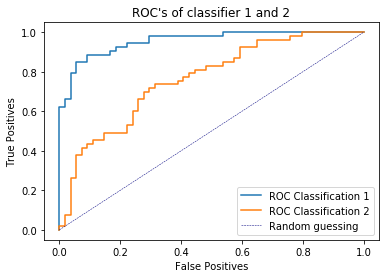

In [109]:
import numpy as np
from sklearn import metrics

label = []
claone = []
clatwo = []

for i in range(len(data)):
    label.append(data[i][0])

for i in range(len(data)):
    claone.append(data[i][1])

for i in range(len(data)):
    clatwo.append(data[i][2])

fpr1, tpr1, thresholds1 = metrics.roc_curve(label, claone, pos_label=None)
fpr2, tpr2, thresholds2 = metrics.roc_curve(label, clatwo, pos_label=None)

lw = 0.5
plt.plot(fpr1, tpr1, label=("ROC Classification 1"))
plt.plot(fpr2, tpr2, label=("ROC Classification 2"))
plt.plot([0, 1], [0, 1], color='navy',lw=lw, linestyle='--', label=("Random guessing"))
plt.title("ROC's of classifier 1 and 2")
plt.xlabel("False Positives")
plt.ylabel("True Positives")
plt.legend()
plt.show()


----
Both Classifiers perform better than the random guessing. They always give more true positives than false positives. The random line always gives an equal amount for both FPR and TPR.

----

#### 3.3.4
(0.5 pts) Compute the AUC scores (area under the curve) of both classifiers using the formula given above. **Write your own code for this calculation.** Do the AUC scores indicate that the classifiers are performing better than this baseline?




 

In [127]:
ones1=[]
zeros1=[]
ones2=[]
zeros2=[]
weight1=0
weight2=0

for idx, i in enumerate(label):
    if i == 1:
        ones1.append(claone[idx])
        ones2.append(clatwo[idx])
    else:
        zeros1.append(claone[idx])
        zeros2.append(clatwo[idx])

n1 = len(ones1)
m1 = len(zeros1)
nTIMESm1= n1*m1

n2 = len(ones2)
m2 = len(zeros2)
nTIMESm2= n2*m2

for idx, i in enumerate(ones1):
    for idx2, j in enumerate(zeros1):
        if i > j:
            weight1+=1
        
for idx, i in enumerate(ones2):
    for idx2, j in enumerate(zeros2):
        if i > j:
            weight2+=1

AUC1=weight1/nTIMESm1
AUC2=weight2/nTIMESm2

print("AUC for class. 1:")
print(AUC1)
print("AUC for class. 2:")
print(AUC2)

AUC for class. 1:
0.9556254367575122
AUC for class. 2:
0.7613556953179594


----
(We assume that with "baseline" the random guessing line is meant.) The baseline has an AUC of 0.5 (1/2 * 1.0 * 1.0 = 0.5). The higher the AUC, the better the performance. In this case, both classifiers have a higher AUC than the baseline so they both perform better than the baseline.

----


#### 3.3.5
(0.25 pts) Using a threshold of 0.5, translate the probability scores to predicted class labels, and compute the accuracy for each of the classifiers.

** hint: **

*Take a look at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html *

In [128]:
from sklearn.metrics import accuracy_score
list1 = []
list2 = []
for i in claone:
    if i >= 0.5:
        list1.append(1)
    else:
        list1.append(0)
for i in clatwo:
    if i >= 0.5:
        list2.append(1)
    else:
        list2.append(0)
print("accuracy classifier 1")
print(accuracy_score(label, list1))
print("accuracy classifier 2")
print(accuracy_score(label, list2))

accuracy classifier 1
0.8598130841121495
accuracy classifier 2
0.6915887850467289


#### 3.3.6
(1 pts) Create the 2x2 table (or array, or list, or dataframe..) of wrong and correct classifications by the first and the second classifier, like in the lecture slides (lecture on model evaluation, part on the sign test). Perform a sign test to test whether the performance of the two classifiers is significantly different at a significance level of 0.05. **If you are not familiar with sign testing, you can read the example provided below.**


** hints: **  
*As explained in the lecture slides, the sign test is a binomial test on the lower-left ($N_{1<2}$) and upper-right ($N_{1>2}$) elements of the cross table. Unlike in the lecture slides, here you need to perform a two-sided test: $$\textrm{p-value} = P(W \leq \min(N_{1<2},N_{1>2}) \textrm{ or } W \geq  \max(N_{1<2},N_{1>2})$$
The function `scipy.stats.binom.cdf` can be used to compute the cumulative density of the binomial distribution.
For more information on the sign test, see the included paper by Salzberg (signtest.pdf, in particular section 3.1).*

In [130]:
from scipy.stats import binom

classif = [[0,0], [0,0]]
out = ["Correct", "Wrong"]
q=0

for i in data:
    if list1[q] == i[0] and list2[q] == i[0]:
        classif[0][0] += 1
    elif list1[q] == i[0] and not list2[q] == i[0]:
        classif[0][1] += 1
    elif not (list1[q] == i[0]) and list2[q] == i[0]:
        classif[1][0] += 1
    elif not (list1[q] == i[0] and list2[q] == i[0]):
        classif[1][1] += 1
    q+=1

print("\t\t\tM2\n\t\t","Correct", "Wrong")

q=0
for i in classif:
    print("M1", out[q],"\t", i[0], "\t", i[1], "\t|", (i[0] + i[1]))
    q+=1
    
print("\t\t _\n\t\t", classif[0][0] + classif[1][0], ("\t"), classif[0][1] + classif[1][1])

N_M1 = classif[0][1]
N_M2 = classif[1][0]
n = N_M1 + N_M2
binomial = binom(n, 0.5)
mini = binomial.cdf(min(N_M1,N_M2))
maxi = (1 - binomial.cdf(max(N_M1,N_M2) - 1))
pvalue = mini + maxi

print("p-value: ")
print(pvalue)

			M2
		 Correct Wrong
M1 Correct 	 66 	 26 	| 92
M1 Wrong 	 8 	 7 	| 15
		 _
		 74 	 33
p-value: 
0.0029350556433200854


----
Since the p-value is lower than 0.05, is the performance significant.

----

## Example two-sided sign test

Imagine you have a lucky coin, that you are certain does not result in heads 50% of the times you flip it. However, you friend (lets call him *zero_hypothesis*) claims that your coin is just like his random coin. To verify whether this is true, you decide to compare the performance (you are a scientist after all) of your lucky coin resulting in heads to the performance of his random coin resulting in heads with a sign test. How do you do this?

First, you collect data. Assume you place 23 bets. During those 23 bets, you both flip your respective coins. It was determined that if one of you flipped head while the other didn't, that person won the bet, and the other person lost. If you both got the same outcome, neither of you won. 1 stands for head, and 0 for tails. These were your results:

In [90]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

#results
lucky_coin = np.array([1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1])
random_coin= np.array([0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0])

print('----------lucky | random \n',*['bet {:<5}  | {} | {}\n'.format(t[0],t[1],t[2]) for t in zip(range(0,len(lucky_coin)),lucky_coin,random_coin)],'-----\n')

----------lucky | random 
 bet 0      | 1 | 0
 bet 1      | 1 | 1
 bet 2      | 1 | 0
 bet 3      | 0 | 1
 bet 4      | 1 | 0
 bet 5      | 1 | 1
 bet 6      | 1 | 0
 bet 7      | 1 | 0
 bet 8      | 1 | 0
 bet 9      | 0 | 1
 bet 10     | 1 | 0
 bet 11     | 1 | 1
 bet 12     | 1 | 0
 bet 13     | 1 | 1
 bet 14     | 0 | 1
 bet 15     | 1 | 1
 bet 16     | 1 | 1
 bet 17     | 0 | 0
 bet 18     | 1 | 0
 bet 19     | 1 | 0
 bet 20     | 1 | 0
 bet 21     | 0 | 0
 bet 22     | 1 | 0
 -----



Now you calculate how often in any pair of outcomes one coin *won*, i.e. one coin flipped to head while the other flipped to tails.

In [91]:
N_l = sum((lucky_coin == 1) & (random_coin == 0)) #how often your lucky coin won
N_r = sum((lucky_coin == 0) & (random_coin == 1)) #how often the random coin won
N = N_l + N_r #how often one coin was a winner
print('The lucky coin won {} times, while the random won {} times.'.format(N_l,N_r))

The lucky coin won 12 times, while the random won 3 times.


You observed 15 times that one coin won. If both coins resulted in heads 50% of the time, like *zero_hypothesis* stated, you'd expect that both coins have 50% chance of being the winner. So the probability distributions for both N_l and N_r should look something like this, assuming that *zero_hypothesis* is right:

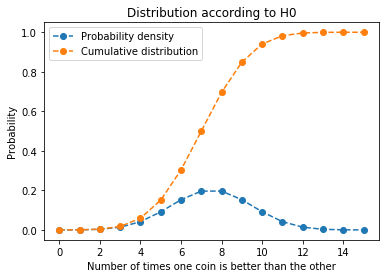

In [92]:
b = binom(N,0.5) #N=observations of inequality, p=prob of one coin being better, which is 0.5 according to your H0
plt.plot(b.pmf(range(N+1)), '--o',label = 'Probability density')
plt.plot(b.cdf(range(N+1)), '--o',label = 'Cumulative distribution')
plt.legend()
plt.xlabel('Number of times one coin is better than the other')
plt.ylabel('Probability')
plt.title('Distribution according to H0')
plt.show()

(Of course this is a discrete probability function, so you're not interested in values between integers.)

As you can see, according to *zero_hypothesis*, 7 and 8 are the most likely values for both N_l and N_r. But this is not what you observed in your data. To conclude that *H0* is false, you need to show that your outcome is unlikely under the assumption that *H0* is true: the values you observed are so extreme that these values or more extreme values occur less than 5% of the time (*p-value < 0.05*). So how unlikely is it that one coin is better 12 times or more, and the other is better 3 times or less?

It's the sum of the values of the probability density function (pdf or pmf in the python doc) at  0,1,2 and 3, plus the sum of the values of the pdf at 12,13,14 and 15. 

This is equal to the value of the cumulative distribution function (cdf) at 3, plus 1 minus the value of cdf at 11 (since `1-cdf(11)` represents the probability of observing 12 or bigger).

In [ ]:
p_value = b.cdf(min(N_r,N_l)) + (1-b.cdf(max(N_r,N_l)-1))
print('The p-value is {:.3f}'.format(p_value))

So your observations are very unlikely if *zero_hypothesis* is right. By statistical theory, you can now say that you have significant reason to reject their opinion. Now the hardest part of statistics: convincing your non-scientist friends.